# Classificação de Espécies de Pinguins

## Importação de Bibliotecas
Vamos começar importando as bibliotecas necessárias para a análise.

In [2]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.cluster import KMeans


## Carregamento e Pré-processamento dos Dados
Nesta seção, vamos carregar o conjunto de dados e realizar o pré-processamento necessário.

In [3]:
# Carregamento dos dados
df = pd.read_csv("penguins_size.csv")

# Exibição das primeiras linhas e informações do dataset
print(df.head())
print(df.info())


  species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen               NaN              NaN                NaN   
4  Adelie  Torgersen              36.7             19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null 

In [4]:
# Estatísticas descritivas
print(df.describe())

       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        342.000000       342.000000         342.000000   342.000000
mean          43.921930        17.151170         200.915205  4201.754386
std            5.459584         1.974793          14.061714   801.954536
min           32.100000        13.100000         172.000000  2700.000000
25%           39.225000        15.600000         190.000000  3550.000000
50%           44.450000        17.300000         197.000000  4050.000000
75%           48.500000        18.700000         213.000000  4750.000000
max           59.600000        21.500000         231.000000  6300.000000


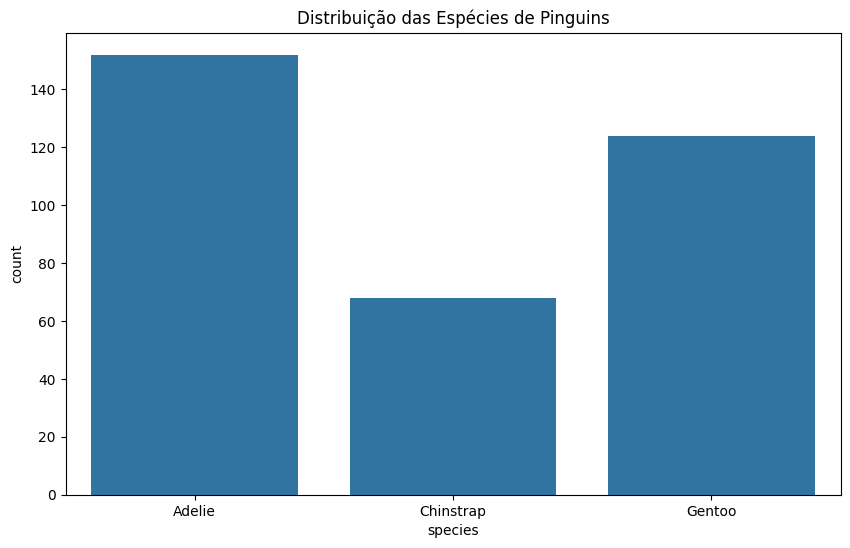

In [5]:
# Distribuição das espécies
plt.figure(figsize=(10, 6))
sns.countplot(x='species', data=df)
plt.title('Distribuição das Espécies de Pinguins')
plt.show()

In [6]:
# Pré-processamento dos dados
# Remover variáveis não numéricas
df_numeric = df.select_dtypes(include=[np.number])

# Tratar valores ausentes
df_numeric = df_numeric.dropna()

# Normalizar os dados
scaler = StandardScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)

df_cleaned = df_normalized[df['species'].notna()]
y_cleaned = df['species'].loc[df_cleaned.index]


print(df_normalized.head())

   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
0         -0.884499         0.785449          -1.418347    -0.564142
1         -0.811126         0.126188          -1.062250    -0.501703
2         -0.664380         0.430462          -0.421277    -1.188532
3         -1.324737         1.089724          -0.563715    -0.938776
4         -0.847812         1.748985          -0.777373    -0.689020


/tmp/ipykernel_15387/4014471604.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cleaned = df_normalized[df['species'].notna()]


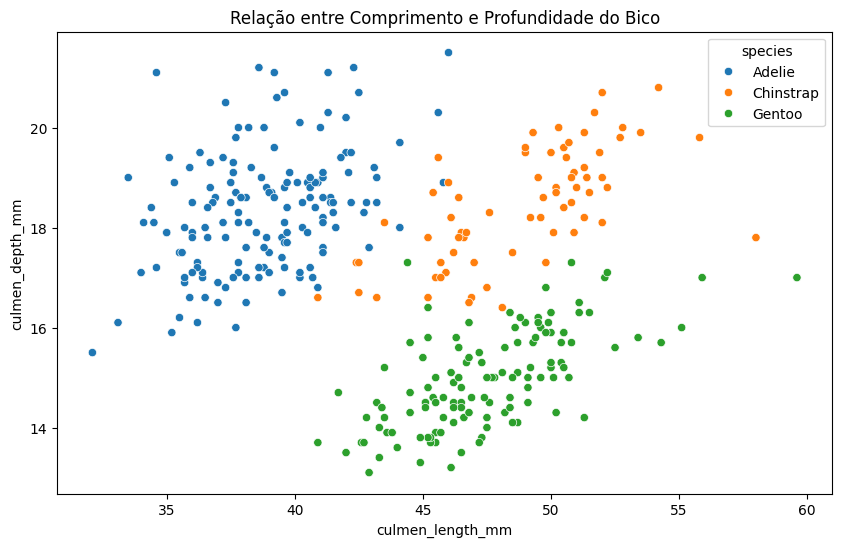

In [7]:
# Relação entre comprimento e profundidade do bico
plt.figure(figsize=(10, 6))
sns.scatterplot(x='culmen_length_mm', y='culmen_depth_mm',
                hue='species', data=df)
plt.title('Relação entre Comprimento e Profundidade do Bico')
plt.show()

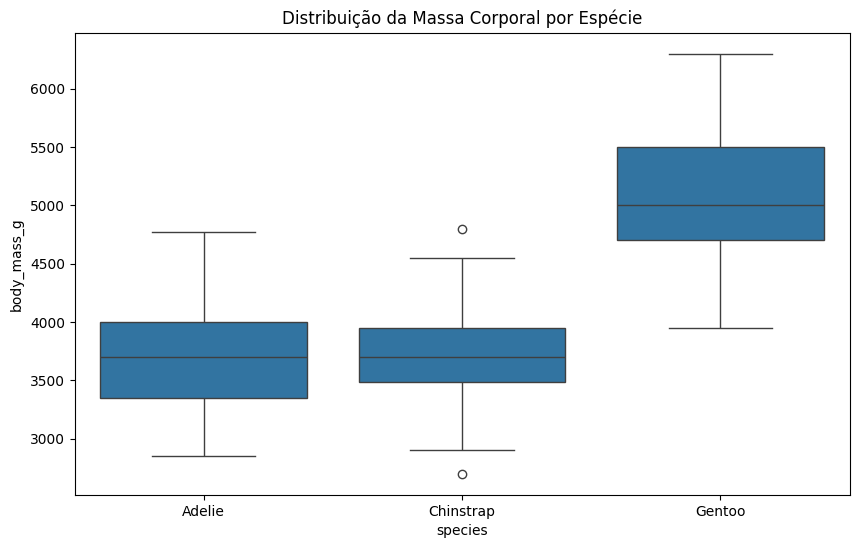

In [8]:
# Distribuição da massa corporal por espécie
plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='body_mass_g', data=df)
plt.title('Distribuição da Massa Corporal por Espécie')
plt.show()

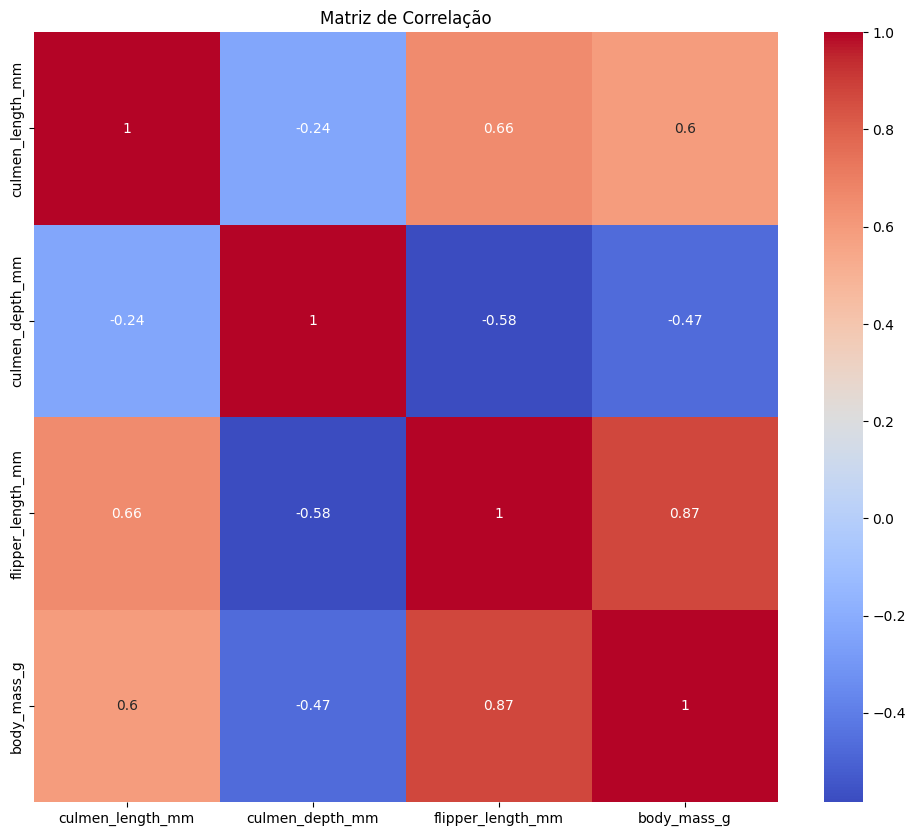

In [9]:
# Matriz de correlação
corr = df.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

# Q1: 
### Escolhi Random Forest e Árvore de Decisão, mas poderia também usar KNN no lugar de Random Forest para esse problema de classificação

In [10]:
# Divisão dos dados em conjuntos de treinamento e teste

X = df_cleaned
y = y_cleaned
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Implementação dos modelos
arvore_d = DecisionTreeClassifier(random_state=42)
floresta_a = RandomForestClassifier(random_state=42)


# Q2: 
### F1 para avaliação por combinar TPR e Precisão

In [11]:
# Avaliando com F1-Score
model_arvore = arvore_d.fit(X_train, y_train)
y_pred_dt1 = model_arvore.predict(X_test)

model_floresta = floresta_a.fit(X_train, y_train)
y_pred_rf1 = model_floresta.predict(X_test)

print('Árvore de Decisão:', f1_score(y_test, y_pred_dt1, average='weighted'))

print('Floresta Aleatória:', f1_score(y_test, y_pred_rf1, average='weighted'))

Árvore de Decisão: 0.9434061249918028
Floresta Aleatória: 0.9579638041675678


In [12]:
# matriz de confusão
print('Matriz de Confusão - Árvore de Decisão')
print(confusion_matrix(y_test, y_pred_dt1))

print('Matriz de Confusão - Floresta Aleatória')
print(confusion_matrix(y_test, y_pred_rf1))


Matriz de Confusão - Árvore de Decisão
[[32  3  0]
 [ 1 11  0]
 [ 0  0 22]]
Matriz de Confusão - Floresta Aleatória
[[32  3  0]
 [ 0 12  0]
 [ 0  0 22]]


# Q3: 
### Treinando modelos de classficação aplicando GridSearch

In [13]:
# Q3 Validação cruzada e busca de hiperparâmetros
dt_params = {'max_depth': [3, 5, 7, 10], 'min_samples_split': [2, 5, 10]}
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7, 10]}

dt_grid = GridSearchCV(arvore_d, dt_params, cv=5, scoring='f1_macro')
rf_grid = GridSearchCV(floresta_a, rf_params, cv=5, scoring='f1_macro')

# Treinamento dos modelos
dt_grid.fit(X_train, y_train)
rf_grid.fit(X_train, y_train)

# Melhor modelo e hiperparâmetros
print('Melhor modelo Árvore de Decisão:', dt_grid.best_params_)
print('Melhor modelo Floresta Aleatória:', rf_grid.best_params_)

# Métricas de avaliação
y_pred_dt2 = dt_grid.predict(X_test)
y_pred_rf2 = rf_grid.predict(X_test)

print('Árvore de Decisão:', f1_score(y_test, y_pred_dt2, average='weighted'))

print('Floresta Aleatória:', f1_score(y_test, y_pred_rf2, average='weighted'))


Melhor modelo Árvore de Decisão: {'max_depth': 3, 'min_samples_split': 5}
Melhor modelo Floresta Aleatória: {'max_depth': 7, 'n_estimators': 100}
Árvore de Decisão: 0.9284604074774206
Floresta Aleatória: 0.9579638041675678


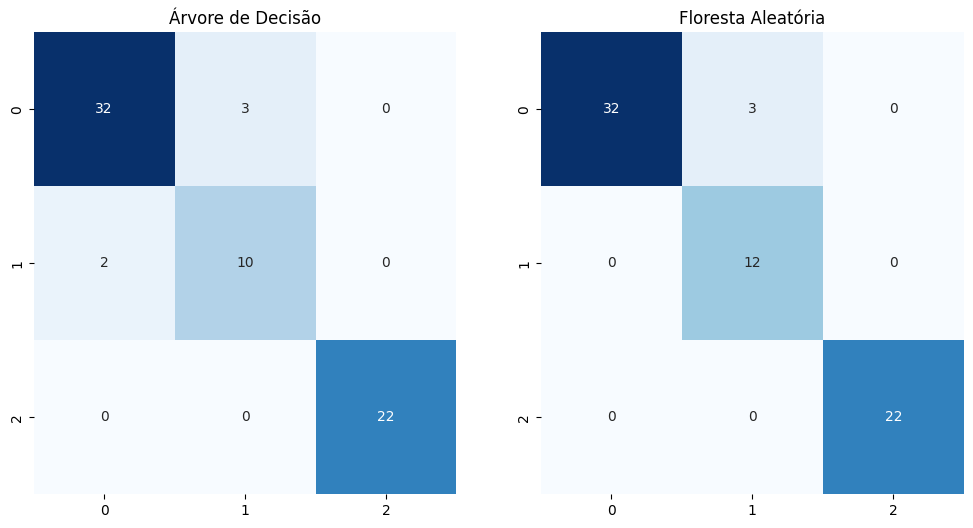

In [14]:
# Matriz de confusão
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_pred_dt2),
            annot=True, cmap='Blues', cbar=False)
plt.title('Árvore de Decisão')
plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, y_pred_rf2),
            annot=True, cmap='Blues', cbar=False)
plt.title('Floresta Aleatória')
plt.show()

## Implementação dos Modelos de Classificação

In [15]:
# Criando modelo de classificação com Random Forest depois do GridSearch
rf = RandomForestClassifier(n_estimators=100, max_depth=7)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Métricas de avaliação

print('Floresta Aleatória antes:', f1_score(y_test, y_pred_rf1, average='weighted'))
print('Floresta Aleatória depois:', f1_score(y_test, y_pred, average='weighted'))


Floresta Aleatória antes: 0.9579638041675678
Floresta Aleatória depois: 0.9717030624959014


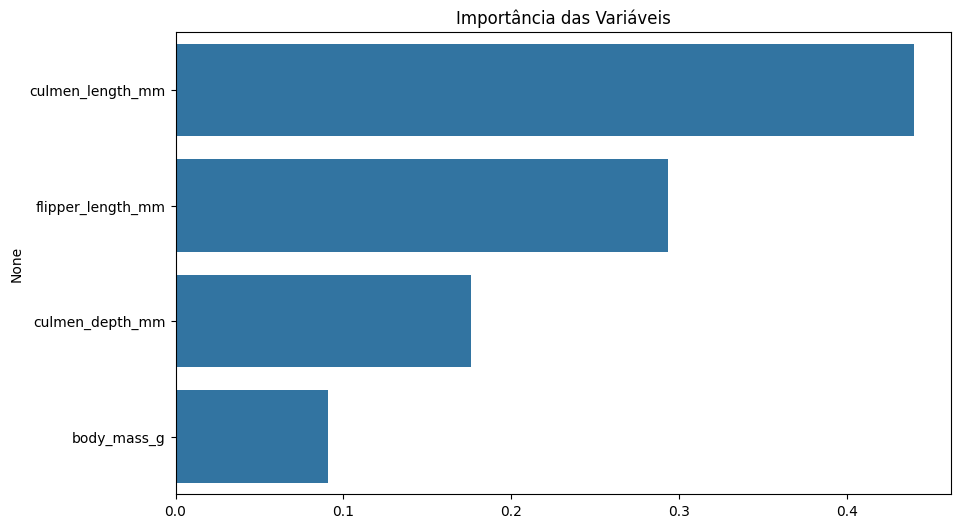

Importância das variáveis (Floresta Aleatória):
culmen_length_mm: 0.4213779351467118
flipper_length_mm: 0.30074612531746553
culmen_depth_mm: 0.1937237539638562
body_mass_g: 0.08415218557196652


In [16]:
# Importância das variáveis
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title('Importância das Variáveis')
plt.show()


importances_rf = rf_grid.best_estimator_.feature_importances_
indices_rf = np.argsort(importances_rf)[::-1]

print("Importância das variáveis (Floresta Aleatória):")
for f in range(len(importances_rf)):
    print(f"{X.columns[indices_rf[f]]}: {importances_rf[indices_rf[f]]}")

In [17]:
# Criando modelo de classificação com Árvore de Decisão após o GridSearch
dt = DecisionTreeClassifier(max_depth=5, min_samples_split=5)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

# Métricas de avaliação
print('Árvore de Decisão antes:', f1_score(y_test, y_pred_dt1, average='weighted'))
print('Árvore de Decisão depois:', f1_score(y_test, y_pred, average='weighted'))


Árvore de Decisão antes: 0.9434061249918028
Árvore de Decisão depois: 0.9579638041675678


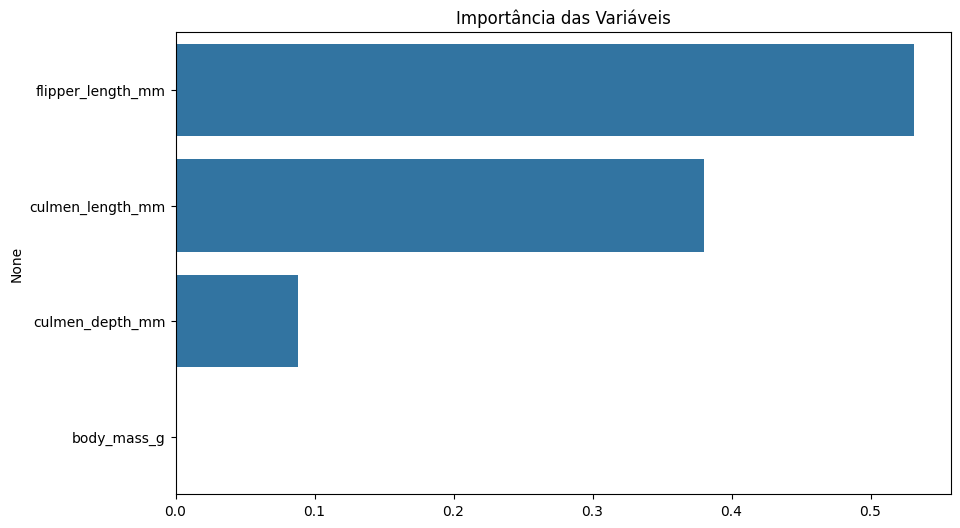

Importância das variáveis (Árvore de Decisão):
flipper_length_mm: 0.5310225129444945
culmen_length_mm: 0.38002334816292405
culmen_depth_mm: 0.08803327463297973
body_mass_g: 0.0009208642596017118


In [18]:

# Importância das variáveis
importances = dt.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title('Importância das Variáveis')
plt.show()

importances_dt = dt.feature_importances_
indices_dt = np.argsort(importances_dt)[::-1]

print("Importância das variáveis (Árvore de Decisão):")
for f in range(X.shape[1]):
    print(f"{X.columns[indices_dt[f]]}: {importances_dt[indices_dt[f]]}")

F1-score médio Árvore de Decisão: 0.9481149883586804
F1-score médio Floresta Aleatória: 0.9721214252718287


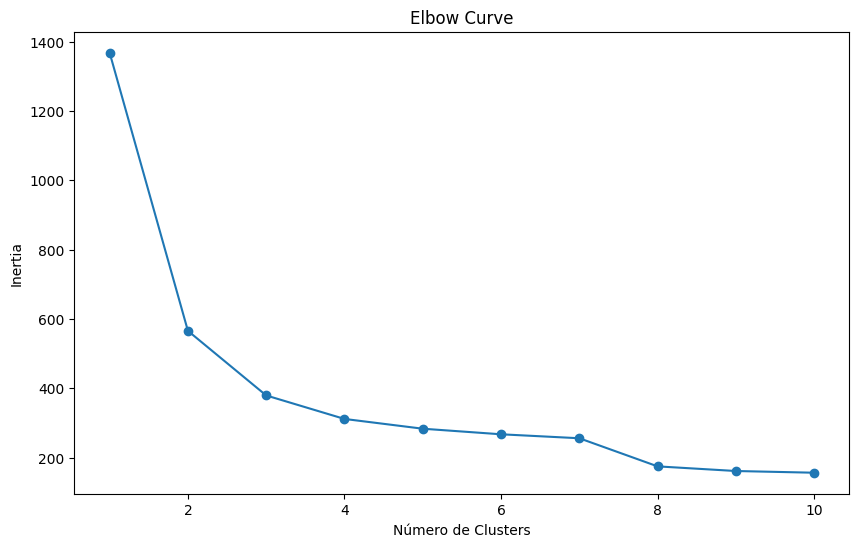

In [19]:
# Verificando se os modelos estão sofrendo de overfitting ou underfitting

# Validação cruzada
scores_dt = cross_val_score(dt, X, y, cv=5, scoring='f1_macro')
scores_rf = cross_val_score(rf, X, y, cv=5, scoring='f1_macro')

print('F1-score médio Árvore de Decisão:', np.mean(scores_dt))
print('F1-score médio Floresta Aleatória:', np.mean(scores_rf))

# Verificando através de gráficos (elbow curve) se estão ocorrendo overfitting ou underfitting
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Curve')
plt.xlabel('Número de Clusters')
plt.ylabel('Inertia')
plt.show()


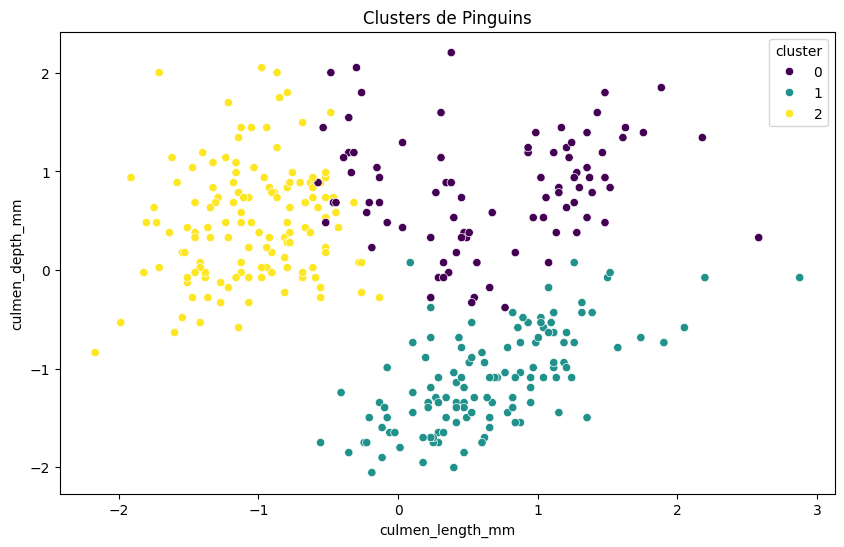

In [20]:
# Clusterização
# K-means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Adicionar os clusters ao dataset
df_cleaned['cluster'] = kmeans.labels_

# Visualização dos clusters

plt.figure(figsize=(10, 6))
sns.scatterplot(x='culmen_length_mm', y='culmen_depth_mm',
                hue='cluster', palette='viridis', data=df_cleaned)
plt.title('Clusters de Pinguins')
plt.show()